# projet realise par : soufiane sejjari

In [1]:
# import libraries
import gspread
import seaborn as sns
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# initialize variables for gspread
scope = ['https://spreadsheets.google.com/feeds',
'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('sheet.json', scope)
client = gspread.authorize(creds)
# define method to pull data from spreadsheet
def GetSpreadsheetData(sheetName, worksheetIndex):
    sheet = client.open(sheetName).get_worksheet(worksheetIndex)
    return sheet.get_all_values()[1:]
dataTest = GetSpreadsheetData('sheet1', 0)
finale=[]

In [5]:
def formatData(data,index):
    vare=[]
    vare.clear()
    for i in  range(len(data[1])):
    
        if i==1:
           if data[index][i]=="Femme":
                data[index][i]=0
           else:
                data[index][i]=1
           vare.append(data[index][i])
       
        if i==2:
           if data[index][i]=="moins de 18ans":
                data[index][i]=0
           elif data[index][i]=="entre 18 et 25ans":
                data[index][i]=1
           elif data[index][i]=="entre 25 et 35":
                data[index][i]=2
           else:
                data[index][i]=3
           vare.append(data[index][i])

        if i==3:
           vare.append(data[index][i])
       
        if i==9:
           data[index][i]=data[index][4]+data[index][5]+data[index][6]+data[index][7]+data[index][8]+data[index][9]
           vare.append(data[index][i])

        if i==10:
           if data[index][i]=="plusieurs fois par année":
                data[index][i]=2
           elif data[index][i]=="des fois par année":
                data[index][i]=1
           elif data[index][i]=="rarement":
                data[index][i]=0
           vare.append(data[index][i])

        if i==11:
           if data[index][i]=="très insatisfait":
                data[index][i]=0
           elif data[index][i]=="peu insatisfait":
                data[index][i]=0
           elif data[index][i]=="Ni satisfait ni insatisfait":
                data[index][i]=1
           elif data[index][i]=="Peu satisfait":
                data[index][i]=2
           else:
                data[index][i]=2
           vare.append(data[index][i])

        if i==12:
            if 'la foule' in data[index][i]:
                vare.append(1)
            else:
                
                vare.append(0)
            if 'manque des employés' in data[index][i]:
                vare.append(1)
            else:
                vare.append(0)
            if 'Une mauvaise manière du traitement' in data[index][i]:
                vare.append(1)
            else:
                vare.append(0)
                

                
        if i==13:
            if data[index][i]=="entre 9 et 11":
                data[index][i]=1
            elif data[index][i]=="entre 11 et 1":
                 data[index][i]=2
            elif data[index][i]=="entre 1 et 3":
                 data[index][i]=3
            elif data[index][i]=="aprés 3":
                    data[index][i]=4
            vare.append(data[index][i])

            
        if i==14:
            if data[index][i]=="lundi":
                data[index][i]=1
            elif data[index][i]=="mardi":
                 data[index][i]=2
            elif data[index][i]=="mercredi":
                 data[index][i]=3
            elif data[index][i]=="jeudi":
                data[index][i]=4
            elif data[index][i]=="vendredi":
                data[index][i]=5
                
            vare.append(data[index][i])

        if i==15:
           vare.append(data[index][i])

        if i==16:
           vare.append(data[index][i])
    return vare



In [6]:
for i in range(len(dataTest)):
    vare=[]
    finale.append(formatData(dataTest,i))
    



In [307]:
t=test['satisfait_score'].index
print(t.values)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [426]:
pd.DataFrame(finale).to_csv('projetCommuneN.csv', index_label = "Index", header  = ['sexe','age','province','bureau','visite_score','satisfait_score','la foule','Manque des employé','mauvaise maniere Traitement','les_horaires','jourFoule','bureauAvis','amileoration']) 


In [7]:
test=pd.read_csv('projetCommune.csv')
test=test.drop(['Index','bureauAvis','amileoration'],axis=1)
test.head()

,sexe,age,province,bureau,visite_score,satisfait_score,la foule,Manque des employé,mauvaise maniere Traitement,les_horaires,jourFoule
0,0,1,ZOUGHA,ZOUGHA,0,1,1,0,0,1.0,1.0
1,0,1,ZOUGHA,ZOUGHA,0,1,0,0,1,NaN,NaN
2,1,3,JNAN EL WARD,SAHB LWARD,2,2,0,0,1,NaN,NaN
3,1,1,FES-MEDINA,KARAOUIYINE,0,2,0,0,1,NaN,NaN
4,0,1,ZOUGHA,ZOUGHA,0,1,1,0,0,1.0,2.0


In [70]:
model=KNeighborsClassifier(n_neighbors=7)

In [63]:
y=test['satisfait_score']
x=test.drop(['bureau','province','satisfait_score'],axis=1)

In [71]:
model.fit(X,Y)
model.score(X,Y)

0.94375

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print('train set:',X_train.shape)
print('test set:',X_test.shape)


train set: (128, 8)
test set: (32, 8)


In [36]:
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.7396226415094339

In [37]:
model.score(X_test,y_test)

0.5970149253731343

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


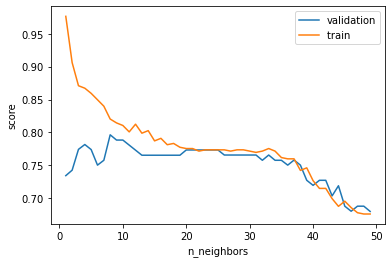

In [72]:
from sklearn.model_selection import validation_curve
modele=KNeighborsClassifier()
k=np.arange(1,50)
train_score, val_score=validation_curve(model,X_train,y_train,'n_neighbors', k,cv=5)
plt.plot(k,val_score.mean(axis=1),label="validation")
plt.plot(k,train_score.mean(axis=1),label="train ")
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()




In [67]:
from sklearn.model_selection import GridSearchCV
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [62]:
param_grid={'n_neighrbors':np.arange(1,20),
            'metric': ['euclidean','manhattan']}

grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)


NameError: name 'GridSearchCV' is not defined

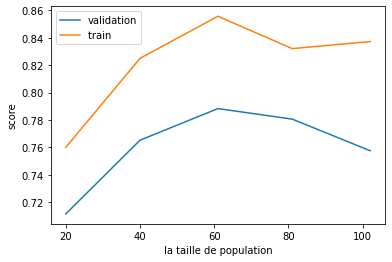

In [73]:
from sklearn.model_selection import learning_curve
N, train_score,val_score=learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.2,1.0,5),cv=5)
plt.plot(N,val_score.mean(axis=1),label="validation")
plt.plot(N,train_score.mean(axis=1),label="train ")
plt.ylabel('score')
plt.xlabel('la taille de population')
plt.legend()

In [57]:
from sklearn.feature_selection import VarianceThreshold

In [275]:
X_train.var(axis=0).plot.bar()

NameError: name 'X_train' is not defined

In [85]:
from sklearn.cluster import KMeans
modelk=KMeans(n_clusters=3)

In [102]:

modelk.fit(X_train)
modelk.predict(X_train).plot.bar()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [87]:
modelk.cluster_centers_

array([[0.63809524, 1.14285714, 0.71428571, 0.23809524, 0.36190476,
        0.48571429, 0.94285714],
       [0.57142857, 1.07142857, 0.18571429, 2.22857143, 0.61428571,
        0.25714286, 0.54285714],
       [0.44444444, 1.11111111, 1.32222222, 2.9       , 0.02222222,
        0.36666667, 0.8       ]])

(332, 4)

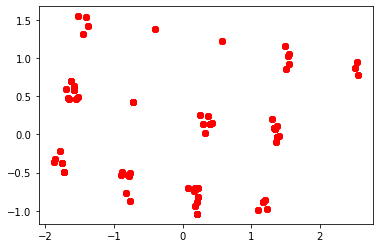

In [109]:
from sklearn.decomposition import PCA
pcaModel=PCA(n_components=0.80)
x_rd=pcaModel.fit_transform(x)
plt.scatter(x_rd[:,0],x_rd[:,1],c='red')
x_rd.shape

# info sur l'analyse

## liste de base
- **target variable** : *satisfait_score*
- **type des variables** : qualitative 9: quantitative:4
- **valeur manquants** : 16 dans les horaire, et jourFoule



In [379]:
r=pd.read_csv('exemple.csv',encoding = "ISO-8859-1")


r.head()

,Index,sexe,age,province,bureau,visite_score,satisfait_score,la foule,Manque des employÃ©,mauvaise maniere Traitement,les_horaires,jourFoule,bureauAvis,amileoration
0,0,0,1,ZOUGHA,ZOUGHA,0,2,1,0,0,1.0,1.0,fucck youuuuuu,NaN
1,1,0,1,ZOUGHA,ZOUGHA,0,2,0,0,1,NaN,NaN,nta matb9ach 7mar,NaN
2,2,1,3,JNAN EL WARD,SAHB LWARD,2,4,0,0,1,NaN,NaN,Diro lina lwifi wclimat,NaN
3,3,1,1,FES-MEDINA,KARAOUIYINE,0,3,0,0,1,NaN,NaN,Aucune idÃ©e,NaN
4,4,0,1,ZOUGHA,ZOUGHA,0,2,1,0,0,1.0,2.0,Organiser les horaires,NaN


In [466]:
x=test.drop(['province','jourFoule','les_horaires'],axis=1)
x.describe()

,sexe,age,visite_score,communication,satisfait_score,la foule,Manque des employé,mauvaise maniere Traitement
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.535714,1.119048,0.750000,0.190476,1.154762,0.440476,0.380952,0.785714
std,0.499467,0.391088,0.722764,0.393262,1.191954,0.497185,0.486345,0.410938
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='les types des variables'>

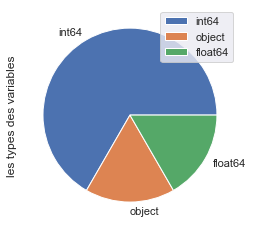

In [457]:
test.dtypes.value_counts().plot.pie(label='les types des variables',legend='legend')

<AxesSubplot:xlabel='les variable', ylabel='nombre d attribut manquants'>

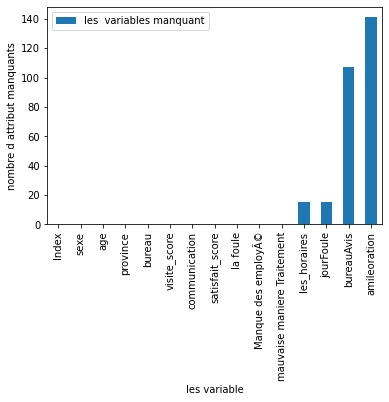

In [255]:
test.isna().sum().plot.bar(label='les  variables manquant',
ylabel='nombre d attribut manquants',
xlabel='les variable',legend="true")

In [481]:
r=test.drop(['sexe','age','province','bureau','visite_score','satisfait_score','les_horaires','jourFoule'],axis=1)

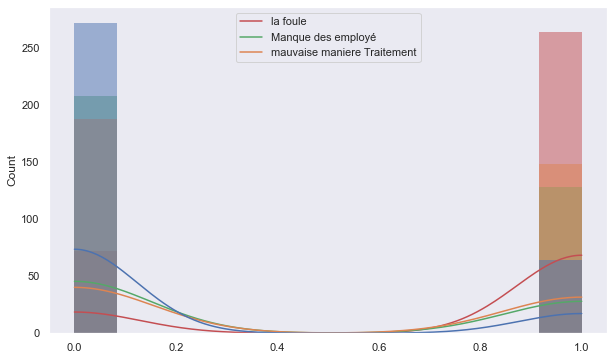

In [482]:
fig = plt.figure(figsize=(10,6))
sns.histplot(r, kde=True, stat="count",label='rfffffffff', linewidth=0)
plt.legend(labels=['la foule','Manque des employé','mauvaise maniere Traitement'])
plt.show()



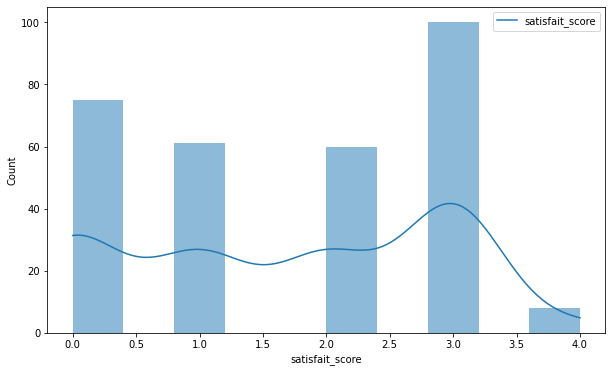

In [258]:
for col in test.select_dtypes( 'int') :
    fig = plt.figure(figsize=(10,6))
    sns.histplot(test[col], kde=True, stat="count",label='rfffffffff', linewidth=0)
    plt.legend(labels=[col])
    sns.color_palette("Paired")

    

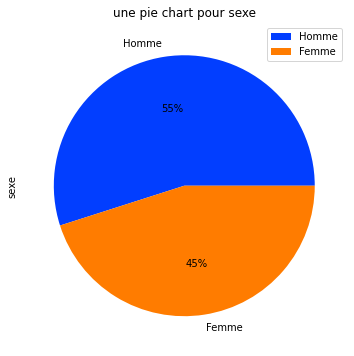

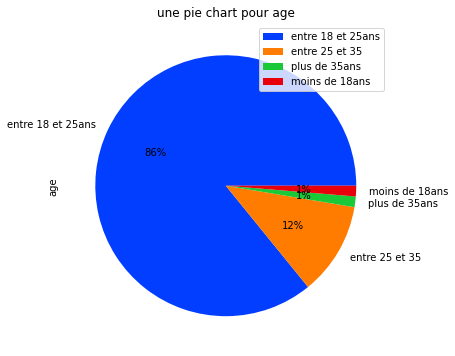

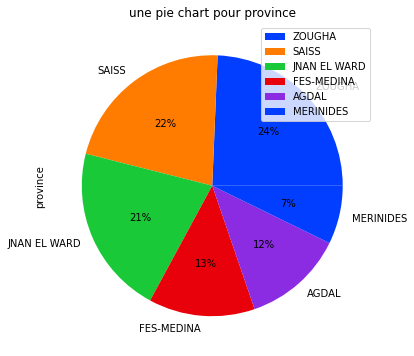

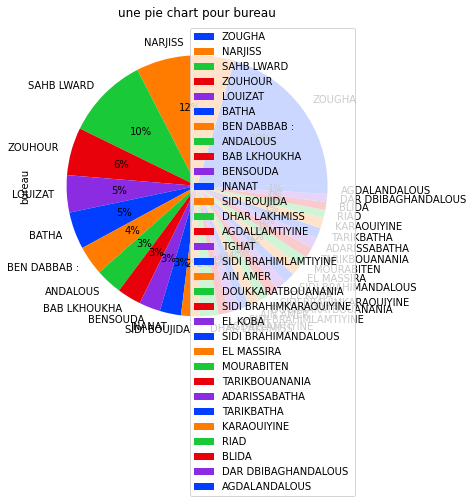

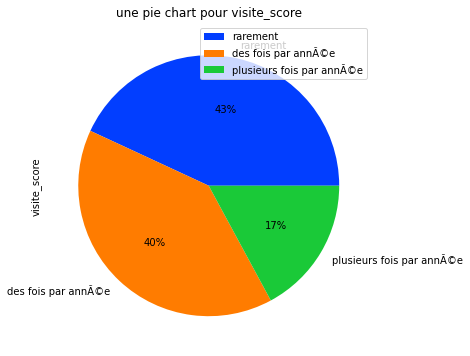

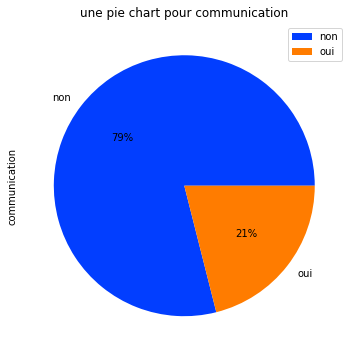

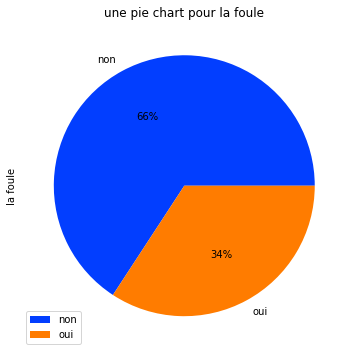

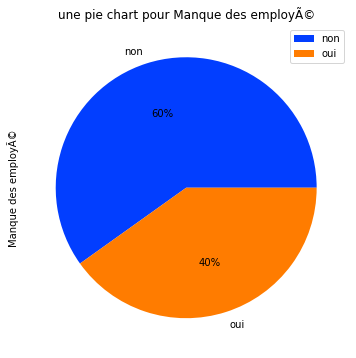

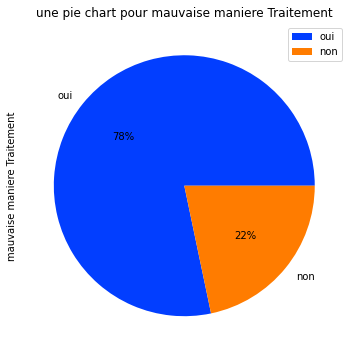

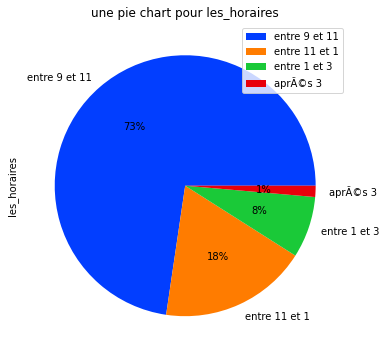

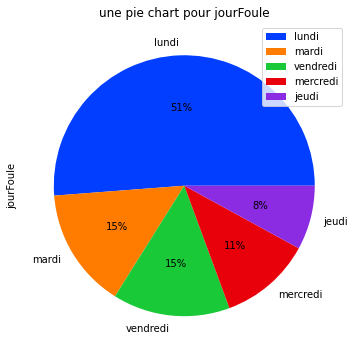

In [259]:
for col in test.select_dtypes('object') :
    fig = plt.figure(figsize=(10,6))
    colors = sns.color_palette('bright')[0:5]   
    test[col].value_counts().plot.pie(colors=colors,autopct='%.0f%%').set(title="une pie chart pour "+col)
    plt.legend(labels=test[col].value_counts().index)
   

    


In [321]:
    satisfait_s=satisfait[col].value_counts()
    satisfait_is=insatisfait[col].value_counts()


    df = pd.DataFrame({
        'satisfait': satisfait_s,
        'insatisfait': satisfait_is
    })
    print(df.index['Index'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Relation 

In [261]:
test['province'].value_counts().decreabe

ZOUGHA          74
SAISS           66
JNAN EL WARD    64
FES-MEDINA      40
AGDAL           38
MERINIDES       22
Name: province, dtype: int64

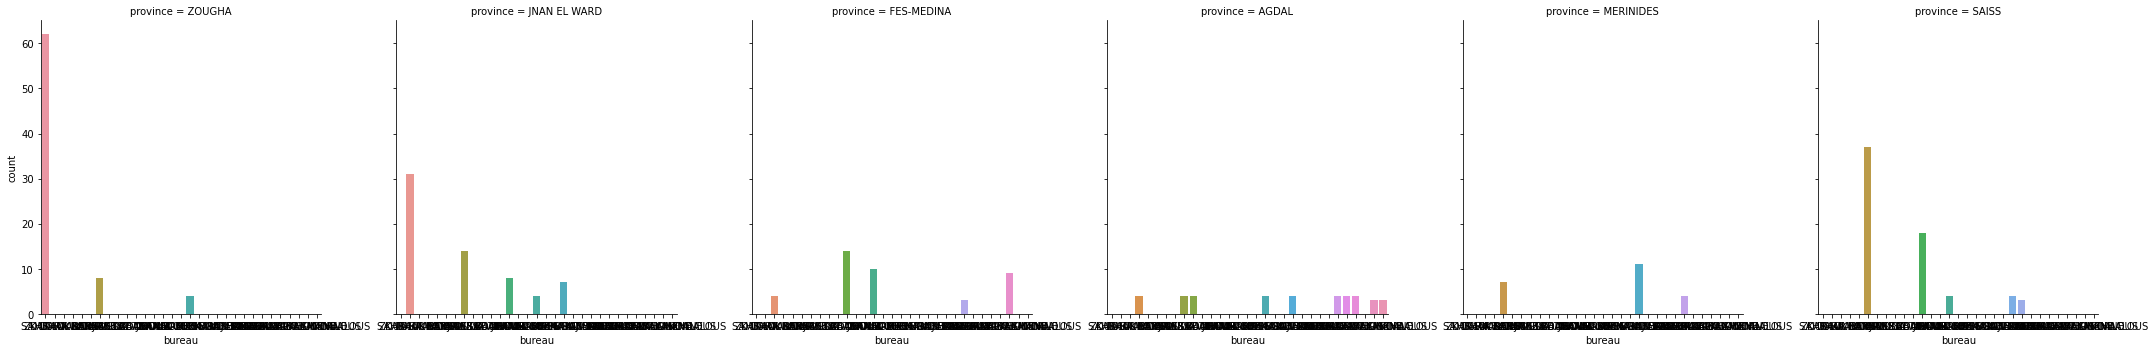

In [291]:
sss=sns.catplot(data=test,x="bureau",col="province",
             kind="count");

In [262]:
ZOUGHA=test[test['province']=='ZOUGHA']


SAISS=test[test['province']=='SAISS']
jnan_el_ward=test[test['province']=='JNAN EL WARD']


FES_MEDINA=test[test['province']=='FES-MEDINA']
AGDAL=test[test['province']=='AGDAL']


MERINIDES=test[test['province']=='MERINIDES']





In [492]:
ZOUGHA.describe()

,satisfait_score
count,74.000000
mean,2.040541
std,1.243495
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


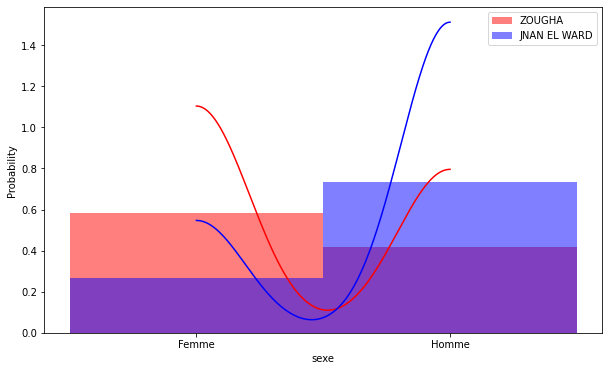

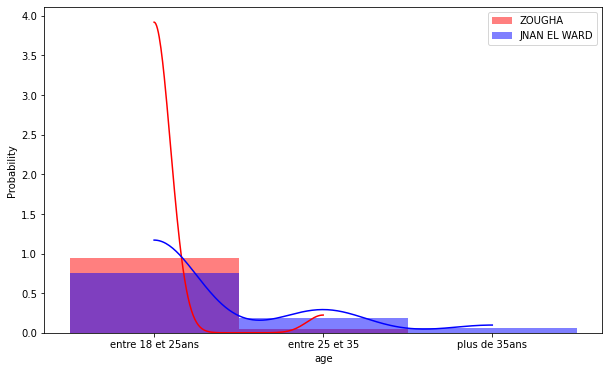

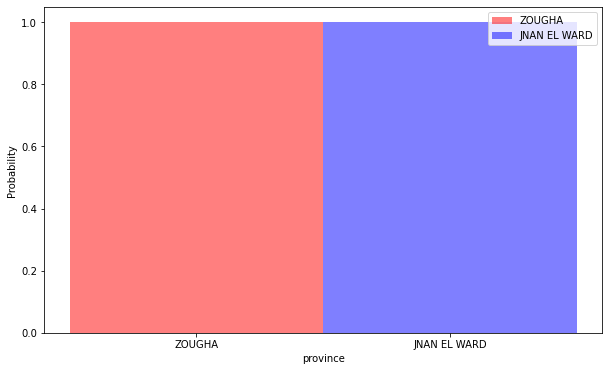

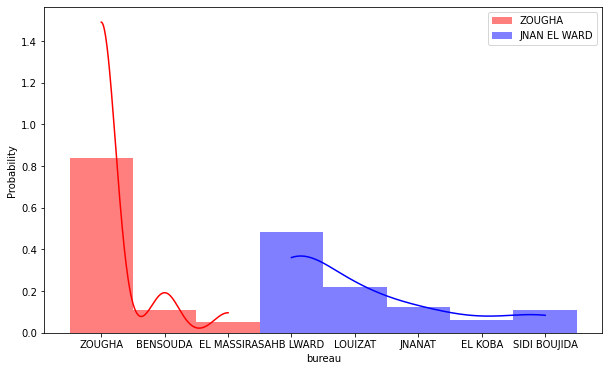

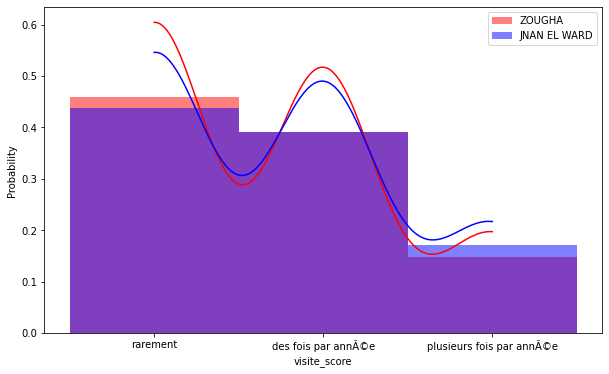

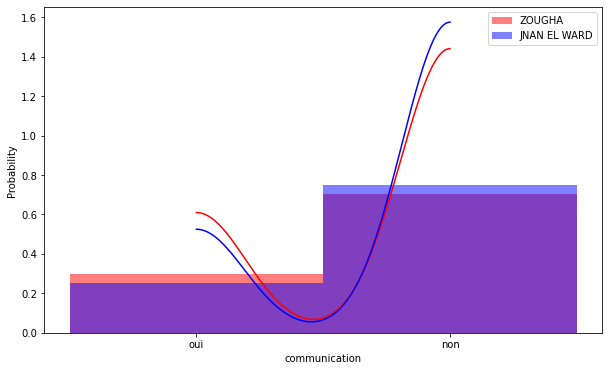

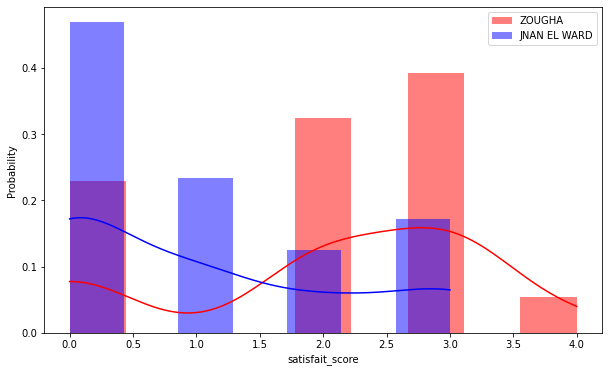

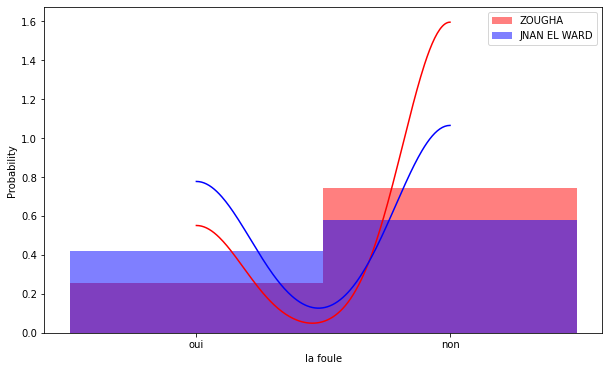

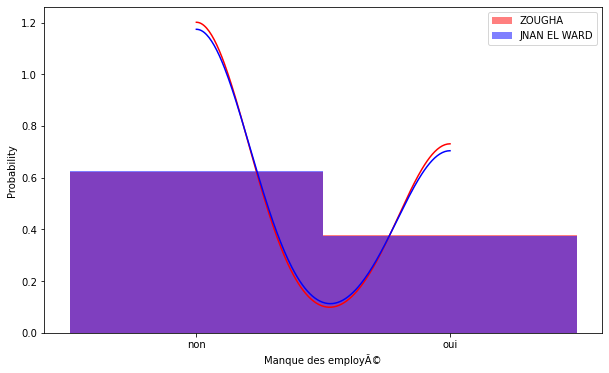

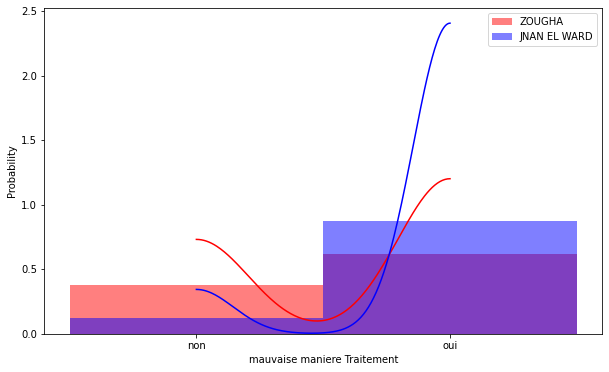

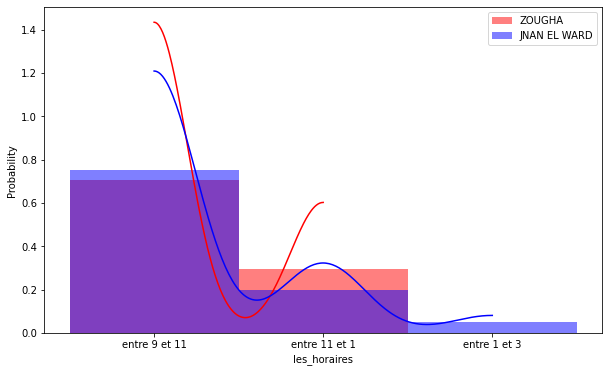

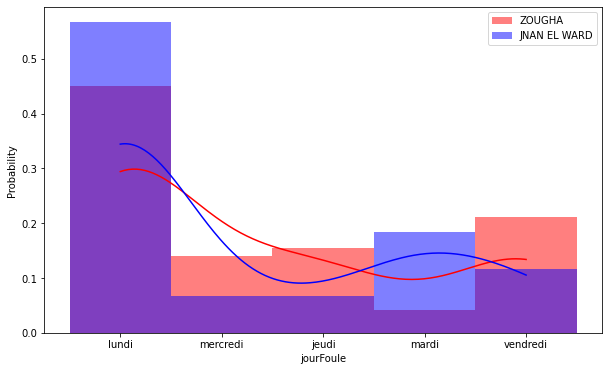

In [289]:
for col in test:
    fig = plt.figure(figsize=(10,6))
    colors = sns.color_palette('bright') 
    
    sns.histplot(ZOUGHA[col], kde=True, stat="probability",label='ZOUGHA',linewidth=0, color='red')
    sns.histplot(jnan_el_ward[col], kde=True, stat="probability",label='JNAN EL WARD',linewidth=0,color='blue')

    sns.set_palette("Paired")
    plt.legend()
    

In [476]:
data=test.groupby('visite_score').sum()['la foule','Manque des employé','mauvaise maniere Traitement'].plot.bar()

KeyError: ('la foule', 'Manque des employé', 'mauvaise maniere Traitement')

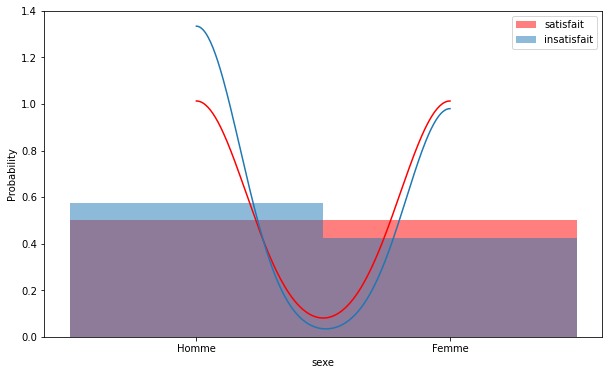

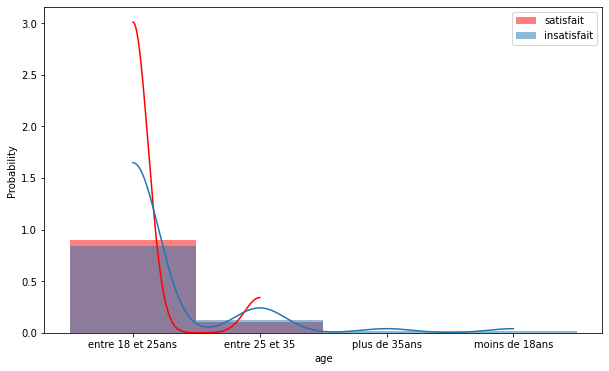

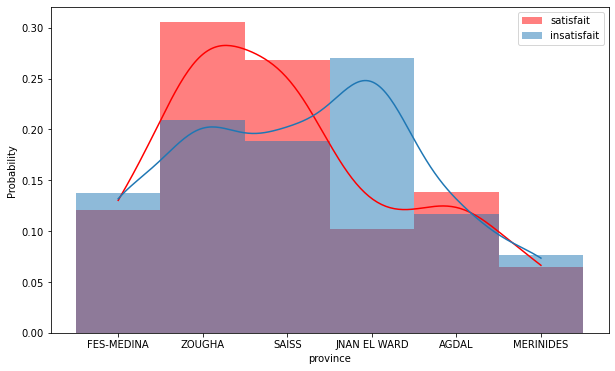

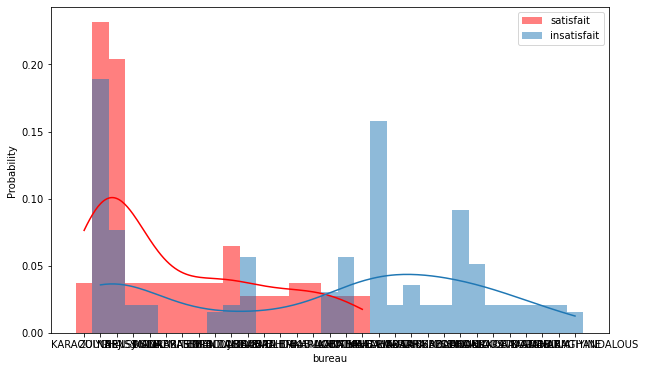

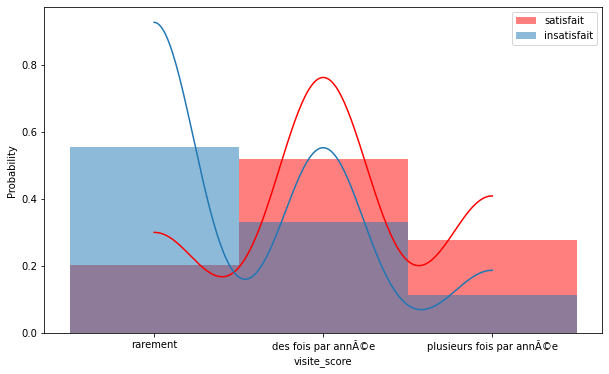

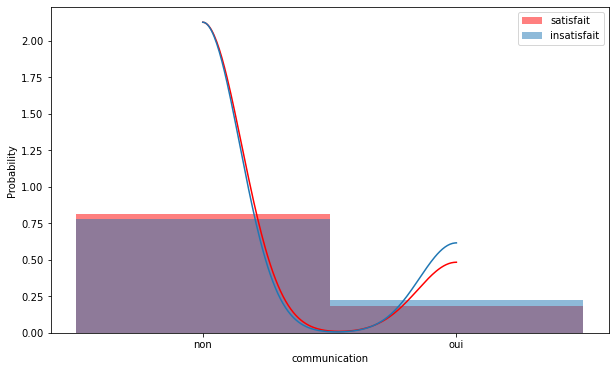

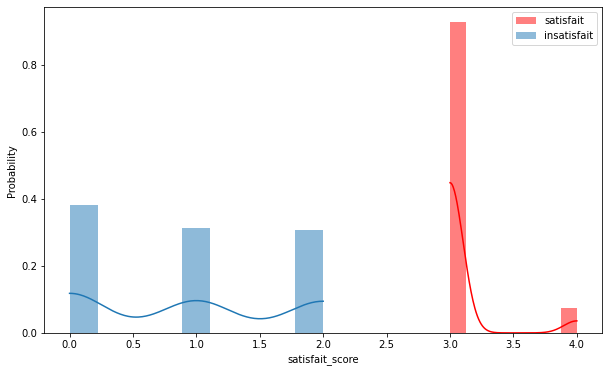

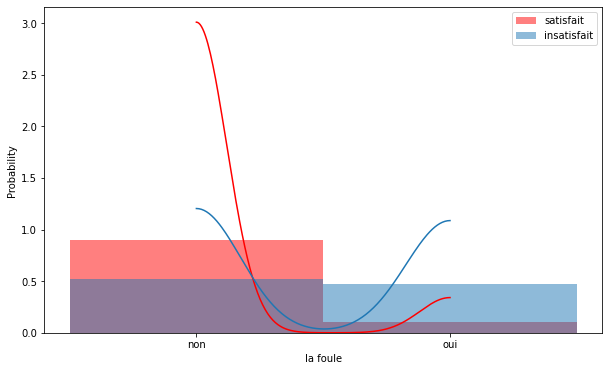

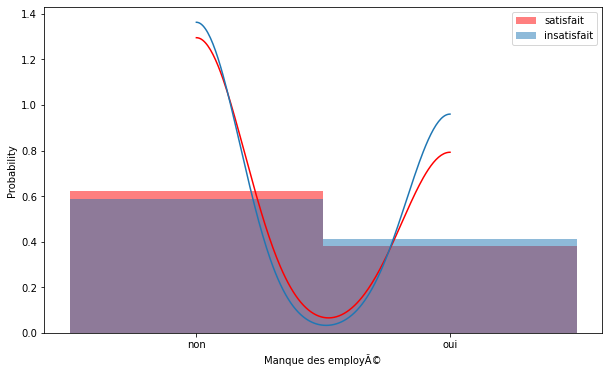

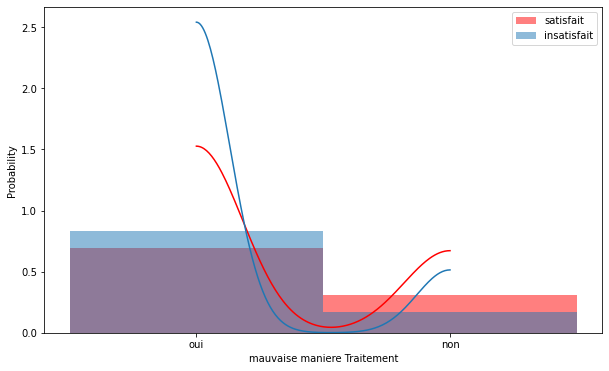

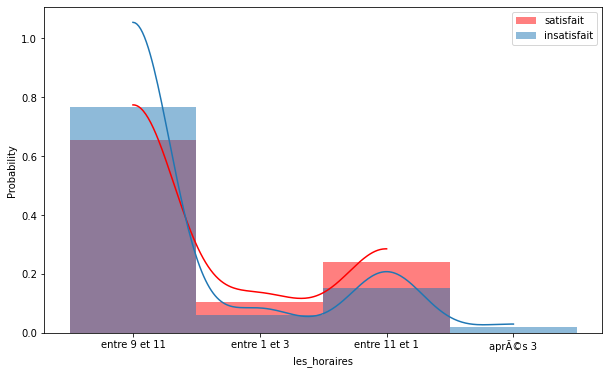

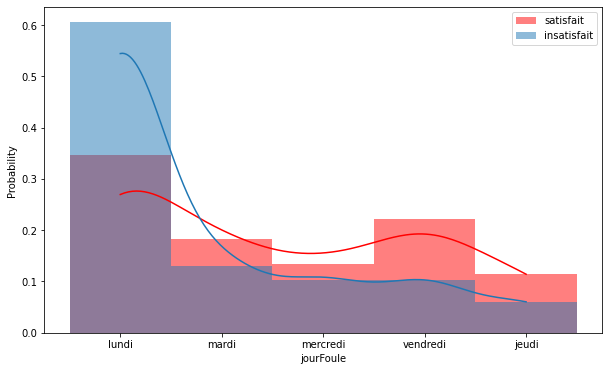

In [263]:
for col in test:
    fig = plt.figure(figsize=(10,6))
    colors = sns.color_palette('bright')[0:5]   
    
    sns.histplot(satisfait[col], kde=True, stat="probability",label='satisfait',linewidth=0,color='red')
    sns.histplot(insatisfait[col], kde=True, stat="probability",label='insatisfait', linewidth=0)

    plt.legend()
    plt.colors=colors

<AxesSubplot:xlabel='la foule', ylabel='count'>

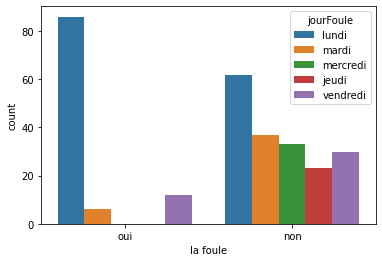

In [264]:
sns.countplot(x='la foule',hue='jourFoule',data=test,linewidth=1)

<AxesSubplot:xlabel='age'>

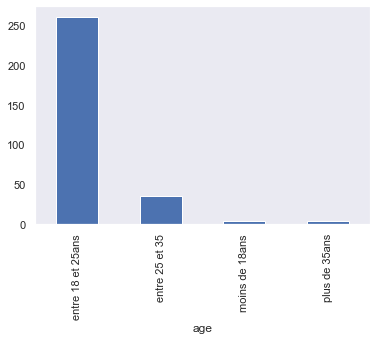

In [399]:
test.groupby(['age']).count()['communication'].plot.bar()


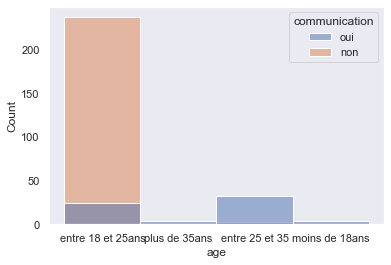

In [361]:
sns.histplot(x='age',hue='communication',data=test,linewidth=1)
sns.set_style("dark")



# correlation entre les variables

<AxesSubplot:>

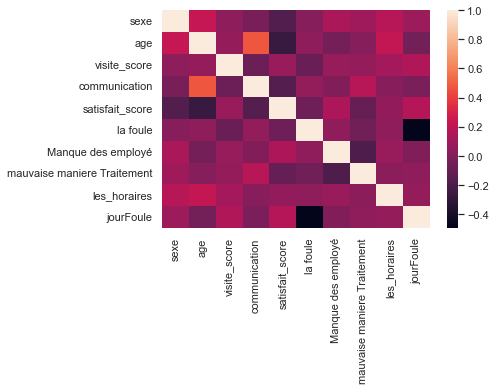

In [483]:
sns.heatmap(test.corr())

<AxesSubplot:xlabel='jourFoule', ylabel='count'>

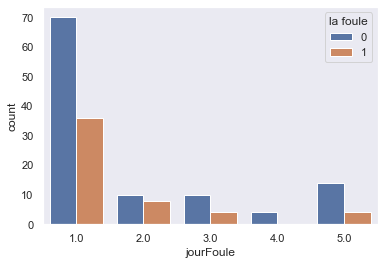

In [487]:
sns.countplot(x='jourFoule',hue='la foule',data=test,linewidth=1)

In [486]:
 data=test.groupby(['age'])['la foule','Manque des employÃ©','mauvaise maniere Traitement'].sum().plot.bar()

C:\Users\pc\AppData\Local\Temp/ipykernel_22852/2733498621.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=test.groupby(['age'])['la foule','Manque des employÃ©','mauvaise maniere Traitement'].sum().plot.bar()


KeyError: "Columns not found: 'Manque des employÃ©'"

In [269]:
test.corr()['satisfit_score'].sort_values()

KeyError: 'satisfit_score'

In [404]:
for col in test :
      if col=='satisfait_score':
          print("teeem")
      else:
                print("no")

no
no
no
no
no
no
teeem
no
no
no
no
no


# test et des hépothes

In [ ]:
satisfait=test[test['satisfait_score']>2]
insatisfait=test[test['satisfait_score']<2]

In [1]:
test.describe()

NameError: name 'test' is not defined

In [437]:

insatisfait_simple=insatisfait.sample(100)
satisfait_simple=satisfait.sample(100)


In [497]:
insatisfait_simple.to_csv("insatisfait_simple.csv",index=False)

In [438]:
from scipy.stats import ttest_ind
balanced_nid=insatisfait_simple.sample(satisfait_simple.shape[0])

In [493]:
def t_test(col):
    alpha=0.05
    stat , p=ttest_ind(balanced_nid[col].dropna(),satisfait_simple[col].dropna())
    if p<alpha :
          return 'H0 reject '
    else :
          return 0
                     

In [495]:

teste=test.drop(['province','bureau'],axis=1)

for col in teste:
    print(f'{col :-<50} {t_test(col)}')

sexe---------------------------------------------- 0
age----------------------------------------------- H0 reject 
visite_score-------------------------------------- H0 reject 
satisfait_score----------------------------------- H0 reject 
la foule------------------------------------------ H0 reject 
Manque des employé-------------------------------- 0
mauvaise maniere Traitement----------------------- 0
les_horaires-------------------------------------- 0
jourFoule----------------------------------------- H0 reject 


In [442]:
teste=test.drop(['province','bureau'],axis=1)

for col in teste:
    print(f'{col :-<50} {t_test(col)}')

sexe---------------------------------------------- H0 reject
age----------------------------------------------- H0 reject
visite_score-------------------------------------- H0 reject
communication------------------------------------- H0 reject
satisfait_score----------------------------------- H0 reject
la foule------------------------------------------ H0 reject
Manque des employé-------------------------------- H0 reject
mauvaise maniere Traitement----------------------- 0
les_horaires-------------------------------------- H0 reject
jourFoule----------------------------------------- H0 reject


In [9]:
from sklearn.feature_selection import SelectKBest, chi2

In [20]:
X=X.dropna(axis=0)
X.head()

,sexe,age,visite_score,la foule,Manque des employé,mauvaise maniere Traitement,les_horaires,jourFoule
0,0,1,0,1,0,0,1.0,1.0
4,0,1,0,1,0,0,1.0,2.0
6,0,1,0,1,0,1,1.0,1.0
7,1,1,1,1,1,1,1.0,5.0
8,1,1,1,0,1,1,3.0,1.0


In [2]:
test=test.dropna(axis=0)
Y=test['satisfait_score']
X=test.drop(['province','bureau'],axis=1)

rrr=chi2(X,Y)

NameError: name 'test' is not defined

In [49]:
print(rrr)

(array([ 5.07479352, 36.56840444,  4.27882915, 75.83982684,  3.46366642,
        0.37930912,  2.39259744,  0.21474613,  8.06909466]), array([7.90719755e-02, 1.14623026e-08, 1.17723741e-01, 3.40087639e-17,
       1.76959708e-01, 8.27244847e-01, 3.02311082e-01, 8.98190528e-01,
       1.76936877e-02]))


In [46]:

resultant = pd.DataFrame(data=[(0 for i in range(len(X.columns))) for i in range(len(X.columns))], 
                         columns=list(X.columns))
# Finding p_value for all columns and putting them in the resultant matrix
resultant.set_index(pd.Index(list(X.columns)), inplace = True)

for i in list(X.columns):
        j="satisfait_score"
        if(j=="satisfait_score"):
            print(j)
            if i != j:
                chi2_val, p_val = chi2(np.array(X[i]).reshape(-1, 1), np.array(X[j]).reshape(-1, 1))
                resultant.loc[i,j] = p_val
print(resultant)

satisfait_score
satisfait_score
satisfait_score
satisfait_score
satisfait_score
satisfait_score
satisfait_score
satisfait_score
satisfait_score
                             sexe  age  visite_score  satisfait_score  \
sexe                            0    0             0     7.907198e-02   
age                             0    0             0     1.146230e-08   
visite_score                    0    0             0     1.177237e-01   
satisfait_score                 0    0             0     0.000000e+00   
la foule                        0    0             0     1.769597e-01   
Manque des employé              0    0             0     8.272448e-01   
mauvaise maniere Traitement     0    0             0     3.023111e-01   
les_horaires                    0    0             0     8.981905e-01   
jourFoule                       0    0             0     1.769369e-02   

                             la foule  Manque des employé  \
sexe                                0                   0   
age

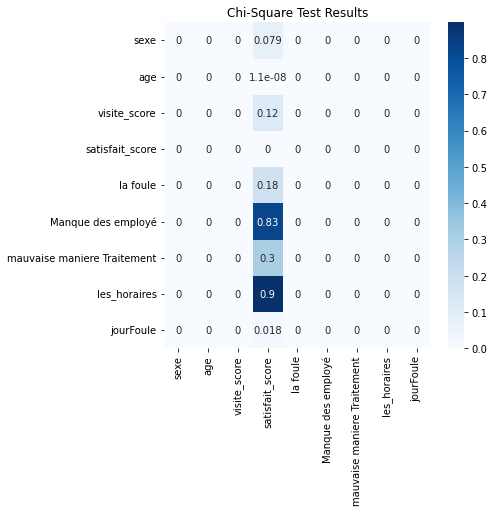

In [47]:
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [53]:
p_values = pd.Series(rrr[1],index = X.columns)
chi2score = pd.Series(rrr[0],index = X.columns)
chi2score.sort_values(ascending = False , inplace = True)

p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

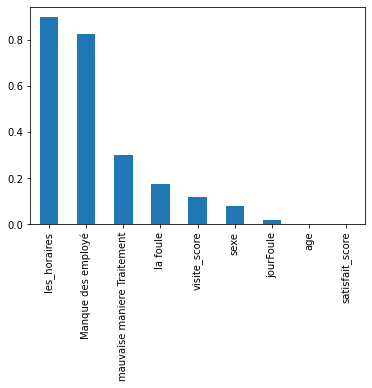

In [59]:
p_values.plot.bar()


In [52]:
pd.crosstab(rrr[1], df.body_style)

ValueError: Data must be 1-dimensional

<AxesSubplot:>

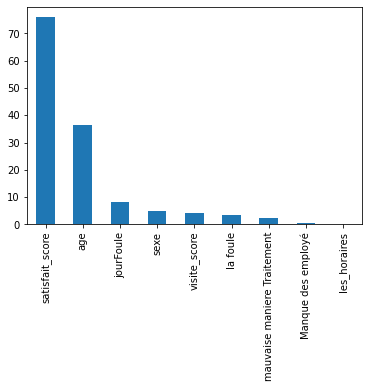

In [60]:
chi2score.plot.bar()


<AxesSubplot:ylabel='Probability'>

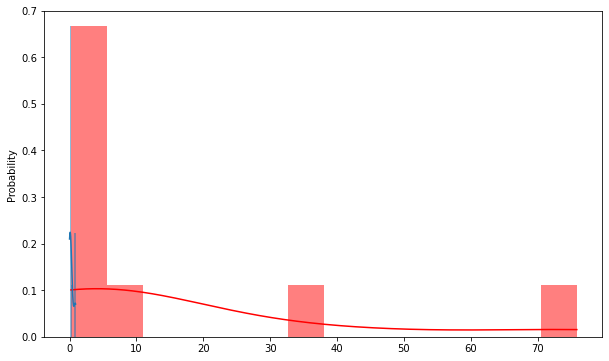

In [58]:
    fig = plt.figure(figsize=(10,6))
    colors = sns.color_palette('bright')[0:5]   
    
    sns.histplot(chi2score, kde=True, stat="probability",label='satisfait',linewidth=0,color='red')
    sns.histplot(p_values, kde=True, stat="probability",label='insatisfait', linewidth=0)
